In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
AR0 = []
x0 = 0
s = 0.25
length = 1000
for _ in range(length):
    e = np.random.normal(scale=np.sqrt(s))
    AR0.append(e)
    
AR0 = np.array(AR0)

In [3]:
AR1 = [0]
x0 = 0
a = 0.5
s = 0.25
length = 1000
for _ in range(length):
    e = np.random.normal(scale=np.sqrt(s))
    AR1.append(a*AR1[-1]+e)
    
AR1 = np.array(AR1)

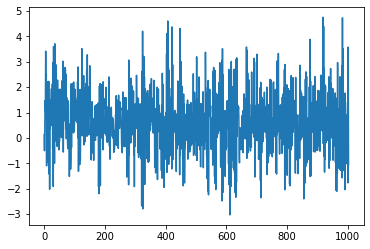

In [4]:
p = 3
s = 0.25

ARp = [np.random.normal(scale=s) for _ in range(p)]
x0 = 0
a_arr = [0.5,-0.25,0.5,0.5,0.5]
length = 1000
for _ in range(length):
    new_value = np.random.normal()
    for i in range(p):
        new_value+=a_arr[i]*ARp[-i]
        
    new_value+=e
    ARp.append(new_value)
    
ARp = np.array(ARp)
plt.plot(ARp)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


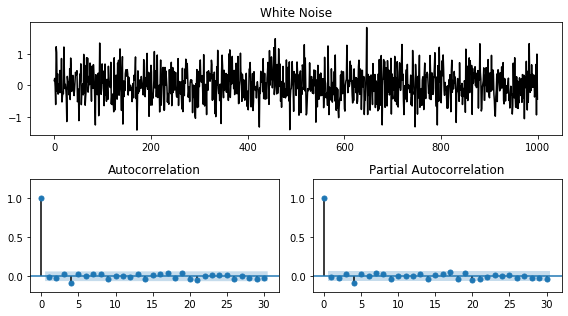

In [5]:
plt.figure(figsize=(16/2,9/2))
ax0 = plt.subplot(211)
ax1 = plt.subplot(223)
ax2 = plt.subplot(224)

ax0.set_title('White Noise')
ax0.plot(AR0, color='black')

plot_acf(AR0, ax=ax1)
plot_pacf(AR0, ax=ax2)
ax1.set_ylim((-0.2,1.25))
ax2.set_ylim((-0.2,1.25))
plt.tight_layout()
plt.savefig('WN_acfpacf.png', transparent=True)


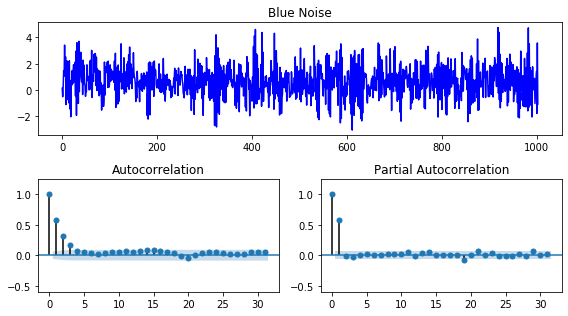

In [6]:
plt.figure(figsize=(16/2,9/2))
ax0 = plt.subplot(211)
ax1 = plt.subplot(223)
ax2 = plt.subplot(224)

ax0.set_title('Blue Noise')
ax0.plot(ARp, color='blue')

plot_acf(AR1, ax=ax1)
plot_pacf(AR1, ax=ax2)
ax1.set_ylim((-0.6,1.25))
ax2.set_ylim((-0.6,1.25))
plt.tight_layout()
plt.savefig('BN_acfpacf.png', transparent=True)

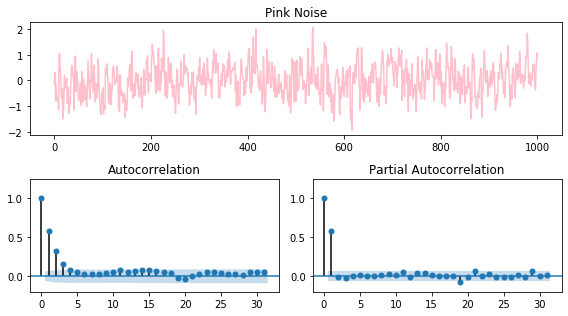

In [7]:
plt.figure(figsize=(16/2,9/2))
ax0 = plt.subplot(211)
ax1 = plt.subplot(223)
ax2 = plt.subplot(224)

ax0.set_title('Pink Noise')
ax0.plot(AR1, color='pink')

plot_acf(AR1, ax=ax1)
plot_pacf(AR1, ax=ax2)
ax1.set_ylim((-0.2,1.25))
ax2.set_ylim((-0.2,1.25))
plt.tight_layout()
plt.savefig('PN_acfpacf.png', transparent=True)

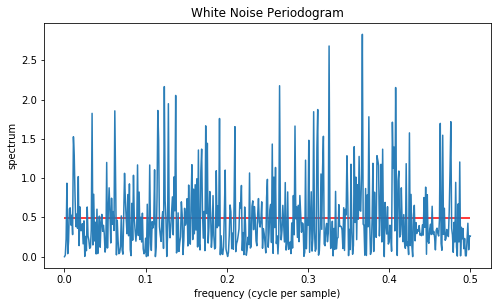

In [11]:
import scipy

f, s = scipy.signal.periodogram(AR0, return_onesided=True)

plt.figure(figsize=(16/2,9/2))
plt.plot(f,s, alpha=0.95)
plt.hlines(y=[np.mean(s)], xmin=np.min(f), xmax=np.max(f), color='red', alpha=1)
plt.title('White Noise Periodogram')
plt.xlabel('frequency (cycle per sample)')
plt.ylabel('spectrum')
plt.savefig('WNPer.png', transparent=True)

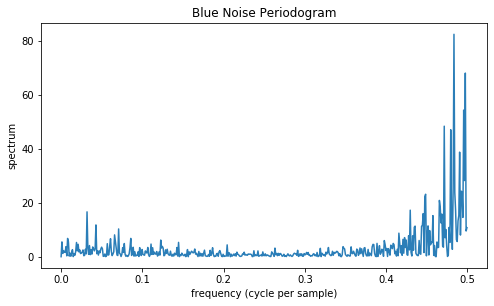

In [14]:
f, s = scipy.signal.periodogram(ARp,return_onesided=True)

plt.figure(figsize=(16/2,9/2))
plt.plot(f,s, alpha=0.95)
# plt.hlines(y=[np.mean(s)], xmin=np.min(f), xmax=np.max(f), color='red', alpha=1)
plt.title('Blue Noise Periodogram')
plt.xlabel('frequency (cycle per sample)')
plt.ylabel('spectrum')
plt.savefig('BNPer.png', transparent=True)

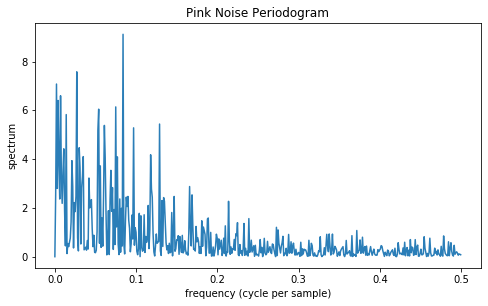

In [13]:
f, s = scipy.signal.periodogram(AR1,return_onesided=True)

plt.figure(figsize=(16/2,9/2))
plt.plot(f,s, alpha=0.95)
# plt.hlines(y=[np.mean(s)], xmin=np.min(f), xmax=np.max(f), color='red', alpha=1)
plt.title('Pink Noise Periodogram')
plt.xlabel('frequency (cycle per sample)')
plt.ylabel('spectrum')
plt.savefig('PNPer.png', transparent=True)
